<table align="left" style="border-style: hidden" class="table"> <tr><td class="col-md-2"><img style="float" src="http://prob140.org/assets/icon256.png" alt="Prob140 Logo" style="width: 120px;"/></td><td><div align="left"><h3 style="margin-top: 0;">Probability for Data Science</h3><h4 style="margin-top: 20px;">UC Berkeley, Spring 2019</h4><p>Ani Adhikari and Jim Pitman</p>CC BY-NC 4.0</div></td></tr></table><!-- not in pdf -->

In [2]:
# HIDDEN
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from scipy import stats

# Homework 11 #

### Instructions

Your homeworks have two components: a written portion and a portion that also involves code.  Written work should be completed on paper, and coding questions should be done in the notebook.  You are welcome to LaTeX your answers to the written portions, but staff will not be able to assist you with LaTeX related issues. It is your responsibility to ensure that both components of the homework are submitted completely and properly to Gradescope. Refer to the bottom of the notebook for submission instructions.

### 1. Sections ###
A class of 60 students has three sections. Summary statistics for scores on Quiz 7:
- Section 1: 25 students, mean 23, SD 3
- Section 2: 20 students, mean 25, SD 2 
- Section 3: 15 students, mean 27, SD 4

Let $S$ be the Quiz 7 score of a student picked at random from the class. Use the code cell below to calculate numerical answers for parts a and b.

**a)** Find $E(S)$.

**b)** Find $SD(S)$.

In [1]:
#calculation for 1a
#E(S) = E(E(S|X))
((25/60 * 23) + (20/60 * 25) + (15/60 * 27))

24.666666666666664

In [4]:
#calculation for 1b
#Var(S) = E(Var(S|X)) + Var(E(S|X)) = E(Var(S|X)) + E(E(S|X)^2) - E(E(S|X))^2
var = ((25/60 * 9) + (20/60 * 4) + (15/60 * 16)) + ((25/60 * 23**2) + (20/60 * 25**2) + (15/60 * 27**2)) - ((25/60 * 23) + (20/60 * 25) + (15/60 * 27))**2

var**(1/2)

3.4115815817431403

### 2. Uniform Stick-Breaking ###
A point $X$ is chosen uniformly from the interval $(0, 10)$ and then a point $Y$ is chosen uniformly from the interval $(0, X)$. This can be imagined as snapping a stick of length 10 and then snapping one of the broken bits. [Stick-breaking](https://en.wikipedia.org/wiki/Dirichlet_process#The_stick-breaking_process) processes are related to the Chinese Restaurant process.

**a)** Find $E(X)$ and $Var(X)$. See [Section 15.3](http://prob140.org/textbook/chapters/Chapter_15/03_Expectation) of the textbook for the variance of the uniform.

**b)** Find $E(Y)$ and $Var(Y)$ by conditioning on $X$.

### 3. Correlation ###
The covariance of random variables $X$ and $Y$ has nasty units: the product of the units of $X$ and the units of $Y$. Dividing the covariance by the two SDs results in an important pure number.

The *correlation coefficient* between random variables $X$ and $Y$ is defined as

$$
r(X, Y) ~ = \frac{Cov(X, Y)}{SD(X)SD(Y)}
$$

It is called the correlation, for short. The definition explains why $X$ and $Y$ are called *uncorrelated* if $Cov(X, Y) = 0$.

**a)** Let $X^*$ be $X$ in standard units and let $Y^*$ be $Y$ in standard units. Check that

$$
r(X, Y) = E(X^*Y^*)
$$

This is the random variable version of the Data 8 definition of the correlation between two data variables: convert each variable to standard units; multiply each pair; take the mean of the products.

**b)** Use the fact that $(X^* + Y^*)^2$ and $(X^* - Y^*)^2$ are non-negative random variables to show that $-1 \le r(X, Y) \le 1$.

[First find the numerical values of $E(X^*)$ and $E({X^*}^2)$. Then find $E(X^* + Y^*)^2$.]

**c)** Show that if $Y = aX+b$ where $a \ne 0$, then $r(X, Y)$ is 1 or $-1$ depending on whether the sign of $a$ is positive or negative.

**d)** Consider a sequence of i.i.d. Bernoulli $(p)$ trials. For any positive integer $k$ let $X_k$ be the number of successes in trials 1 through $k$. **Use bilinearity** to find $Cov(X_n, X_{n+m})$ and hence find $r(X_n, X_{n+m})$.

**e)** Fix $n$ and find the limit of your answer to **c** as $m \to \infty$. Explain why the limit is consistent with intuition.

### 4. Overlapping Counts ###
Consider a sequence of i.i.d. Bernoulli $(p)$ trials. Consider the three variables $X$, $Y$, and $V$ defined by:

- $X$ is the number of successes in trials 1 through 100
- $Y$ is the number of successes in trials 51 through 100
- $V$ is the number of successes in trials 51 through 150

**a)** For each of $X$, $Y$, and $V$, say what the distribution is and provide the parameters.

**b)** Fix $k$ in the range $0, 1, \ldots, 100$ and find the conditional distribution of $Y$ given $X = k$. Recognize this as a famous one and provide the parameters.

**c)** Find the least squares predictor of $Y$ based on $X$ and say whether it is a linear function of $X$. (If it is, then the best linear predictor is in fact the best among all predictors.) Find $Var(Y \mid X)$.

**d)** Find $E(V \mid X)$, $Var(V \mid X)$, and the correlation $r(X, V)$.

**e)** Simulate 20,000 $(X, V)$ pairs and draw the scatter plot of the observed points. Plot $E(V \mid X)$ as a function of $X$ on the same plot. Use the cell below. The arrays `x` and `v` should contain the observed values of $X$ and $V$. The array `exp_V_given_x` should contain $E(V \mid X = x)$ for each $x$ in `x`, using the formula you derived in **d**.

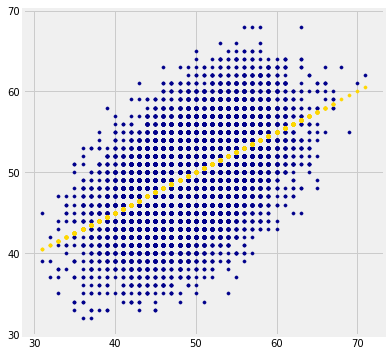

In [3]:
#simulation for 4e

p = 0.5
sumx = make_array()
sumv = make_array()

for i in np.arange(20000):
    trials = np.random.choice(make_array(0, 1), p = make_array(1-p,p), size = 150)
    sumx = np.append(sumx, sum(trials[0:99]))
    sumv = np.append(sumv, sum(trials[50:149]))
x = sumx
v = sumv
exp_V_given_x = sumx / 2 + p*50

# Don't change the lines below
plt.figure(figsize=(6, 6))
plt.axes().set_aspect('equal')
plt.xticks(np.arange(30, 71, 10))
plt.yticks(np.arange(30, 71, 10))
plt.scatter(x, v, color='darkblue', s=10)
plt.scatter(x, exp_V_given_x, color='gold', s=10);

Complete the cell below so that the `x_su` is `x` in standard units, `v_su` is `v` in standard units, and the last line evaluates to the observed correlation between `x` and `v`. Check that the output is consistent with your calculation in **d**.

In [4]:
#4e continued

x_su = (x - p*100) / (100*p*(1-p))**(1/2)
v_su = (v - p*100) / (100*p*(1-p))**(1/2)
np.mean(x_su*v_su)

0.5035360000000001

### 5. Chinese Restaurant Process: Long Run Proportion at Table 1 ###
The goal of this exercise is for you to explain a density that you observed at the end of Lab 10.

Parts **a** and **b** are about the "beta binomial" process we studied extensively in class. You can just apply the results derived in class. You'll find them in Chapter 21 of the textbook.

**a)** Define the "Beta $(1, \theta)$ Binomial" process as follows:

- $X$ has beta $(1, \theta)$ distribution.
- Given $X = p$, there is a sequence of i.i.d. Bernoulli $(p)$ trials $I_1, I_2, \ldots $.
- $S_n = I_1 + I_2 + \cdots + I_n$ is the number of successes in the first $n$ trials.

Fill in the blank with the name of a distribution and the appropriate parameters:

As $n$ gets large, with probability 1 the proportion $\frac{S_n}{n}$ approaches a limit. The distribution of this limit is $\underline{~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~}$.

**b)** For the Beta $(1, \theta)$ Binomial process, find the transition probability $P(S_n = k+1 \mid S_{n-1} = k)$.

Given $S_{n-1} = k$, what are the other possible values of $S_n$ and what are their probabilities?

**c)** Now refer to Lab 10 for the description of Chinese Restaurant process with parameter $\theta$. As in the lab, let $W_n$ be the number of people at Table 1 at time $n$. The goal is of this part of the exercise is to figure out the transition behavior of $W_n$.

Because Table 1 starts deterministically with Person 1 at time 1, we have to be a bit careful about what's random and what's constant. Let's consider $V_n = W_n - 1$, the random number of people *other than Person 1* who are at Table 1 at time $n$.

Find $P(V_{n+1} = k+1 \mid V_n = k)$. This is a straightforward application of the rules of the Chinese Restaurant process, but you have to be careful about how many people are at Table 1 when Person $n+1$ enters the system.

**d)** Given $V_n = k$, what are the possible values of $V_{n+1}$? Compare the transition behavior of the following two sequences:

- $V_2, V_3, \ldots $ of the Chinese Restaurant process with parameter $\theta$
- $S_1, S_2, \ldots $ of the Beta $(1, \theta)$ Binomial process

Then explain why the distribution of the long run proportion of people at Table 1 of the Chinese Restaurant process is beta $(1, \theta)$ where $\theta$ is the parameter of the process. That is, recall that you saw in the lab that the paths of $\frac{W_n}{n}$ converge as $n \to \infty$, and explain why the limit of $\frac{W_n}{n}$ as $n \to \infty$ has the beta $(1, \theta)$ distribution.

## Submission Instructions ##

Many assignments throughout the course will have a written portion and a code portion. Please follow the directions below to properly submit both portions.

### Written Portion ###
*  Scan all the pages into a PDF. You can use any scanner or a phone using applications such as CamScanner. Please **DO NOT** simply take pictures using your phone. 
* Please start a new page for each question. If you have already written multiple questions on the same page, you can crop the image in CamScanner or fold your page over (the old-fashioned way). This helps expedite grading.
* It is your responsibility to check that all the work on all the scanned pages is legible.

### Code Portion ###
* **Save your notebook using File > Save and Checkpoint.**
* Run the cell below to generate a PDF file.
* Download the PDF file and confirm that none of your work is missing or cut off.  If the link leads you to a blank page, use [Command]+[S] or [Ctrl]+[S] to download your work.  

### Submitting ###
* Combine the PDFs from the written and code portions into one PDF.  [Here](https://smallpdf.com/merge-pdf) is a useful tool for doing so.  
* Submit the assignment to Homework 11 on Gradescope.
* **Make sure to assign each page of your pdf to the correct question.**


### **We will not grade assignments which do not have pages selected for each question or were submitted after the deadline.** 

In [ ]:
import gsExport
gsExport.generateSubmission("Homework_11.ipynb")